# Context
Medical Cost Insurance. Can you accurately predict insurance costs?

In [169]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


In [170]:
#Read the data
data= pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [171]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [172]:
data.shape

(1338, 7)

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**We have 1338 total rows and 7 columns.**
3 categorical:

*   sex
*   smoker
*   region

4 numerical:

*   age
*   bmi
*   children
*   charges





In [174]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# Missing values




In [175]:
#Missing values?
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

---
**No missing values!**


In [176]:
data.loc [data.duplicated (),:]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


# Pairplot

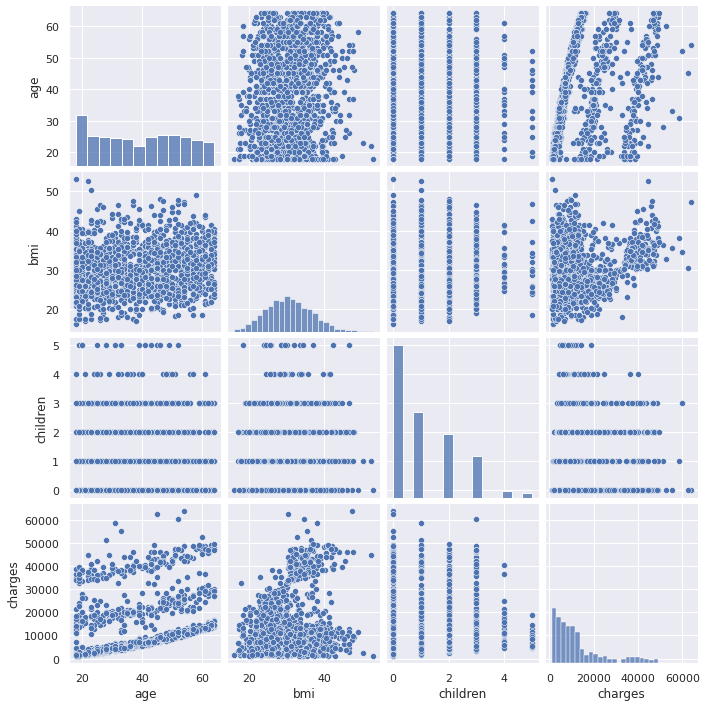

In [177]:
sns.pairplot(data)

[Text(0.5, 1.0, 'AGE vs CHARGES')]

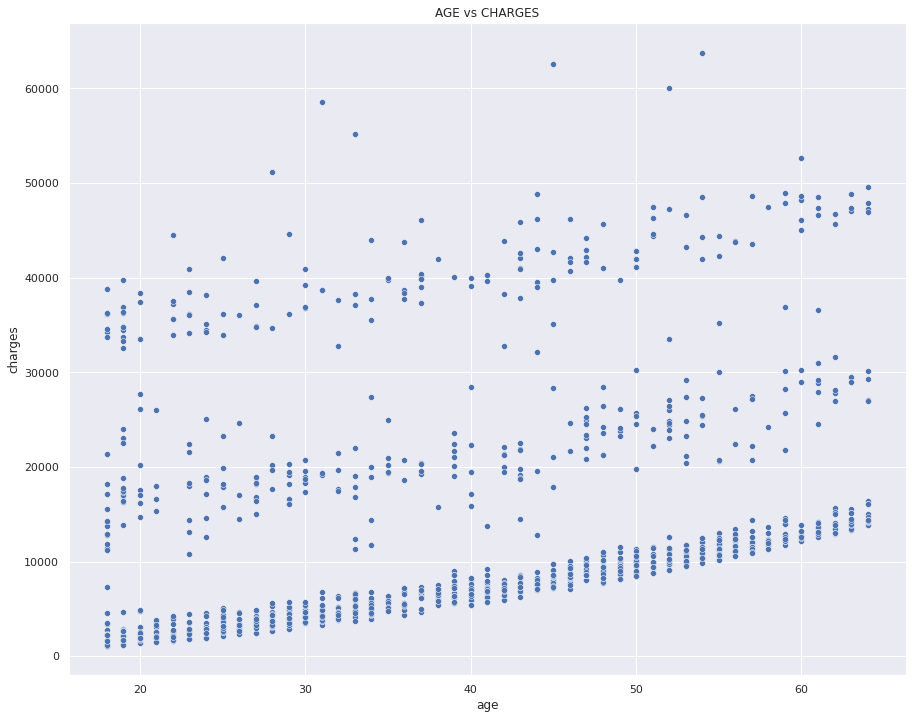

In [178]:
sns.scatterplot(x="age",y="charges",data=data, color="b").set(title='AGE vs CHARGES')

[Text(0.5, 1.0, 'BMI vs CHARGES')]

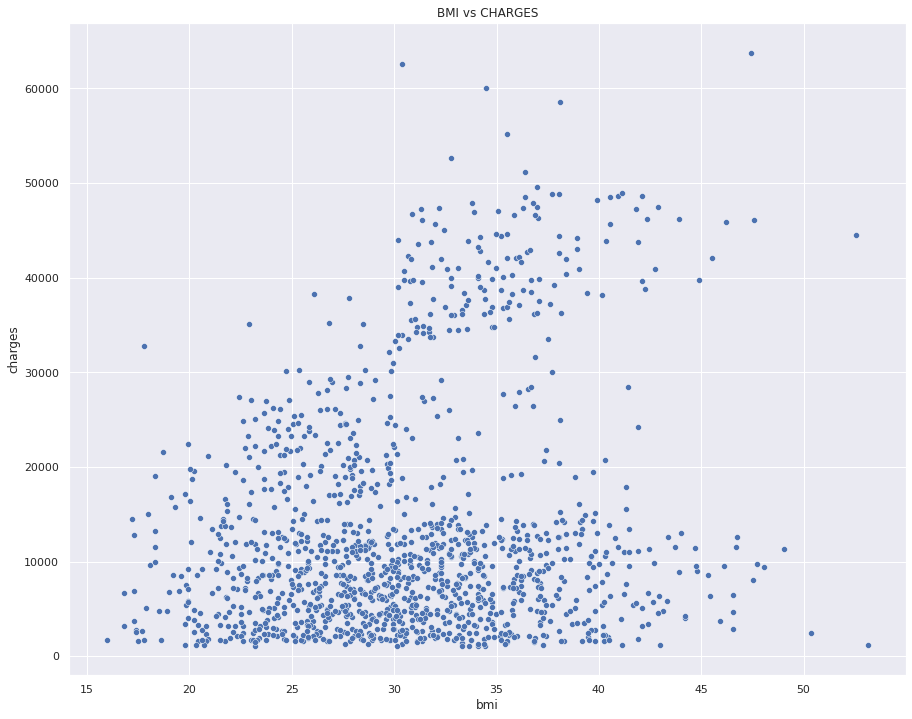

In [179]:
sns.scatterplot(x="bmi",y="charges",data=data,color="b").set(title='BMI vs CHARGES')

# Outliers

In [180]:
data =data[(data.charges<=50000)]

[Text(0.5, 1.0, 'AGE vs CHARGES')]

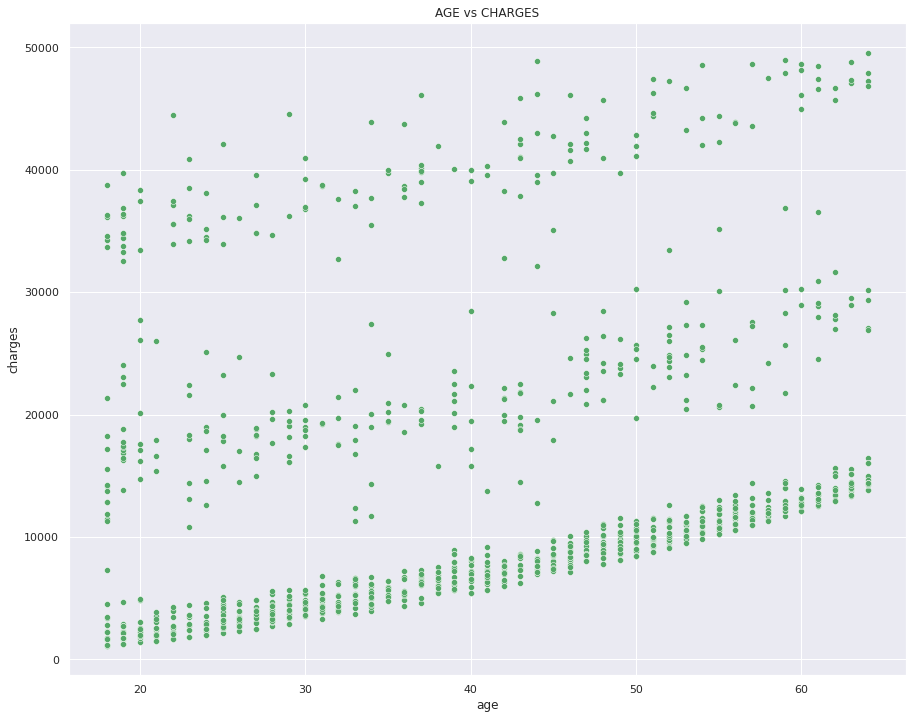

In [181]:
sns.scatterplot(x="age",y="charges",data=data, color="g").set(title='AGE vs CHARGES')

[Text(0.5, 1.0, 'BMI vs CHARGES')]

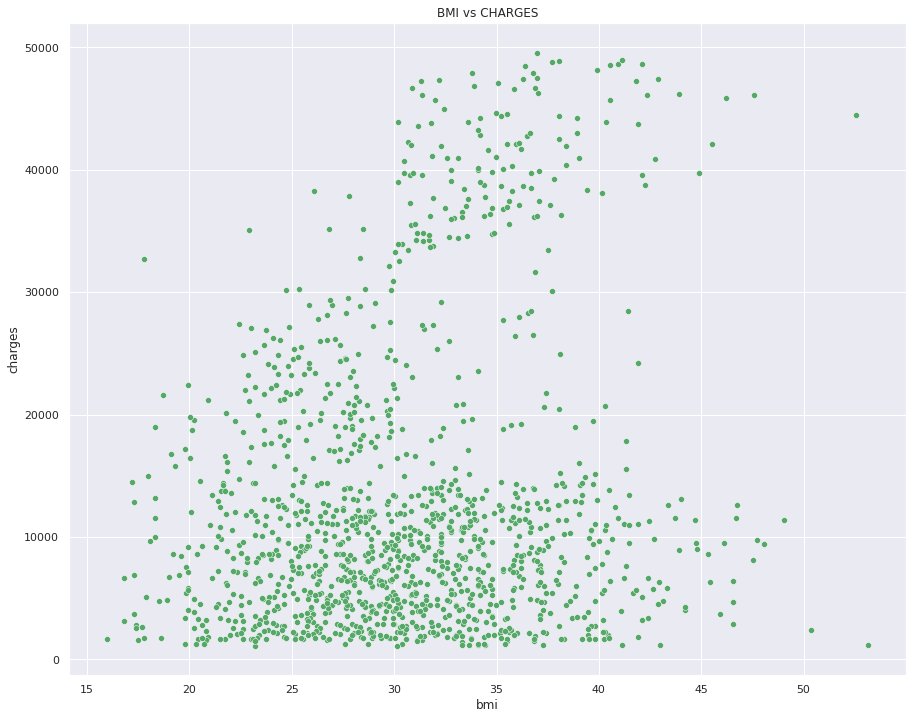

In [182]:
sns.scatterplot(x="bmi",y="charges",data=data, color="g").set(title='BMI vs CHARGES')

# Encoding
One hote encoding

In [183]:
#Sex
sexdummy=pd.get_dummies(data.sex,prefix="sex",drop_first=True)
data = pd.concat([data, sexdummy], axis=1)
data.drop(["sex"],axis=1, inplace=True)

In [184]:
#Smoker
smodummy=pd.get_dummies(data.smoker,prefix="Smoker", drop_first=True)
data = pd.concat([data, smodummy], axis=1)
data.drop(["smoker"],axis=1, inplace=True)

In [185]:
#Region
regdummy=pd.get_dummies(data.region,prefix="region",drop_first=True)
data = pd.concat([data, regdummy], axis=1)
data.drop(["region"],axis=1, inplace=True)

In [186]:
data.head()

,age,bmi,children,charges,sex_male,Smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


# Correlation

In [187]:
data.corr()["charges"]

age                 0.304561
bmi                 0.187061
children            0.076993
charges             1.000000
sex_male            0.057519
Smoker_yes          0.785617
region_northwest   -0.043506
region_southeast    0.074787
region_southwest   -0.045242
Name: charges, dtype: float64

<AxesSubplot:>

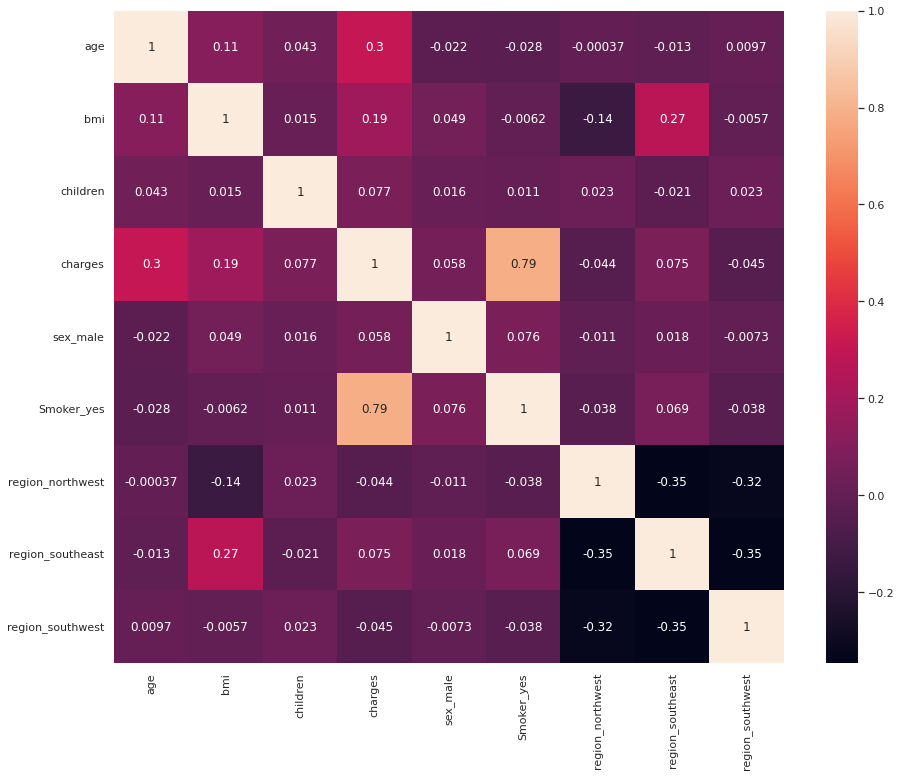

In [188]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(data.corr(),annot=True)

**Observations:**

* There is a strong relationship between the variables Smoker and Age with our target


# EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


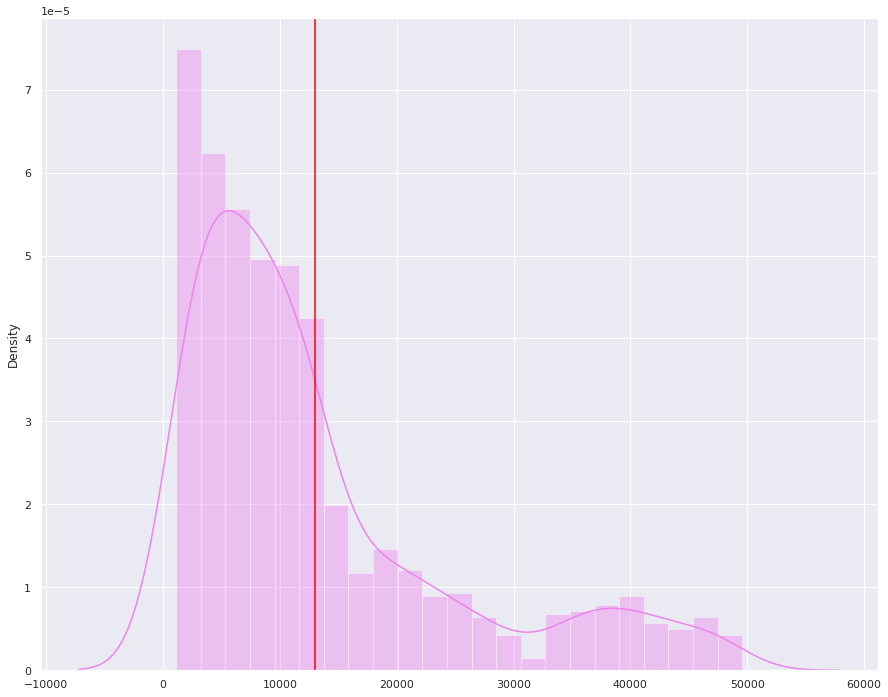

In [189]:
#Target distribution
sns.distplot(data.charges.values, color="violet")
mean= data.charges.mean()
plt.axvline(mean,0,1,color="red")

Most people spend on cheap charges

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of charges for not-smokers')

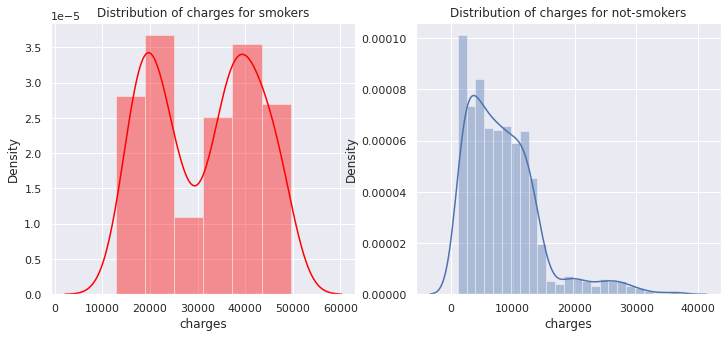

In [190]:
#Target distribution for smokers
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[data.Smoker_yes==1]["charges"], color="red")
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[data.Smoker_yes==0]["charges"])
ax.set_title('Distribution of charges for not-smokers')

For smokers we see that they spend on more expensive charges (> 30,000) and that also many spend on charges either cheap (like everyone else) or very expensive (bimodal graph).
Non-smokers spend much cheaper charges

0    1064
1     267
Name: Smoker_yes, dtype: int64


112

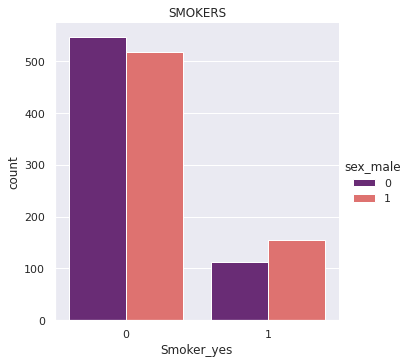

In [191]:
#Smokers
sns.catplot(x="Smoker_yes", kind="count",hue = 'sex_male', palette="magma", data=data).set(title="SMOKERS")
print(data.Smoker_yes.value_counts())
data[(data.sex_male==0) & (data.Smoker_yes==1)].shape[0]

We can see that we have a majority of non-smokers, and for smokers we have that 58% are men.
It can be assumed that the cost of treatment for men will be higher than for women, given the impact of smoking.

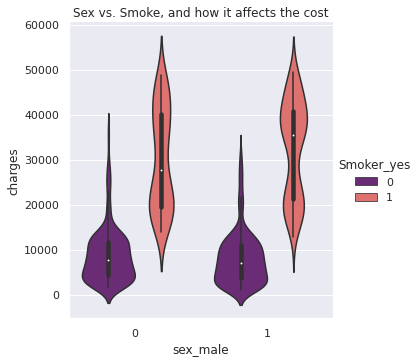

In [192]:
#Sex-Smoke
sns.catplot(x="sex_male", y="charges", hue="Smoker_yes",
            kind="violin", data=data, palette = 'magma').set(title="Sex vs. Smoke, and how it affects the cost")

It is seen again that smokers cover much larger cost ranges

[Text(0.5, 1.0, 'FEMALES')]

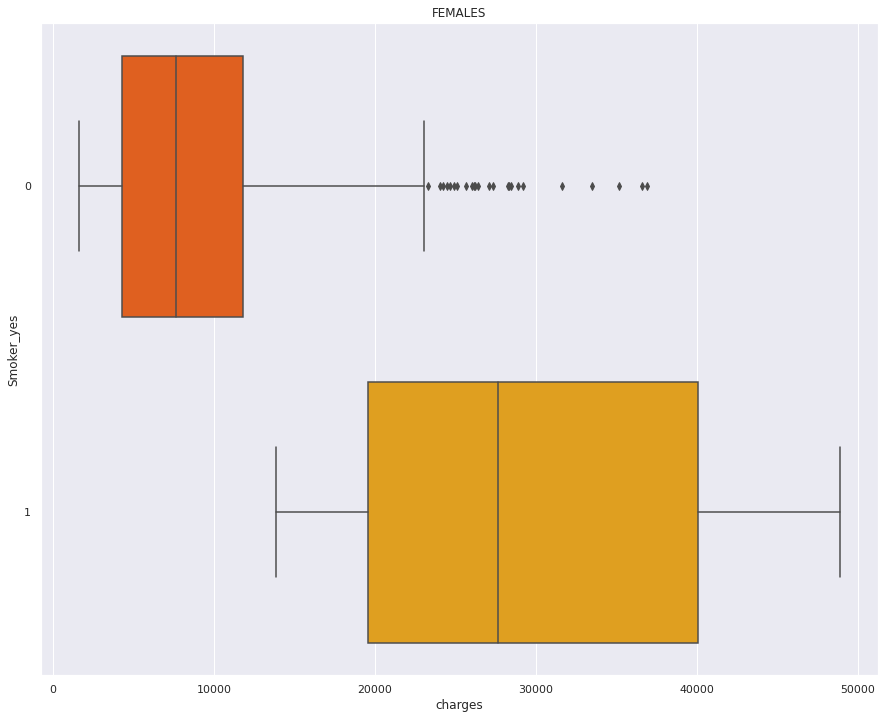

In [193]:
#Females
sns.boxplot(x="charges",y="Smoker_yes", data=data[(data.sex_male==0)], orient="h", palette="autumn").set(title="FEMALES")

[Text(0.5, 1.0, 'MALES')]

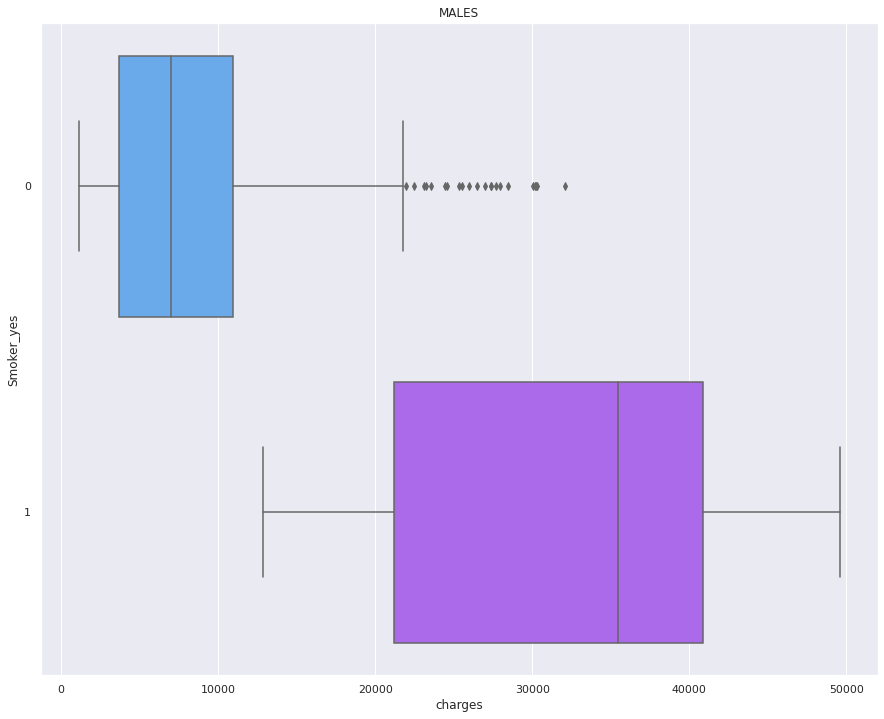

In [194]:
#Males
sns.boxplot(x="charges",y="Smoker_yes", data=data[(data.sex_male==1)], orient="h", palette="cool").set(title="MALES")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


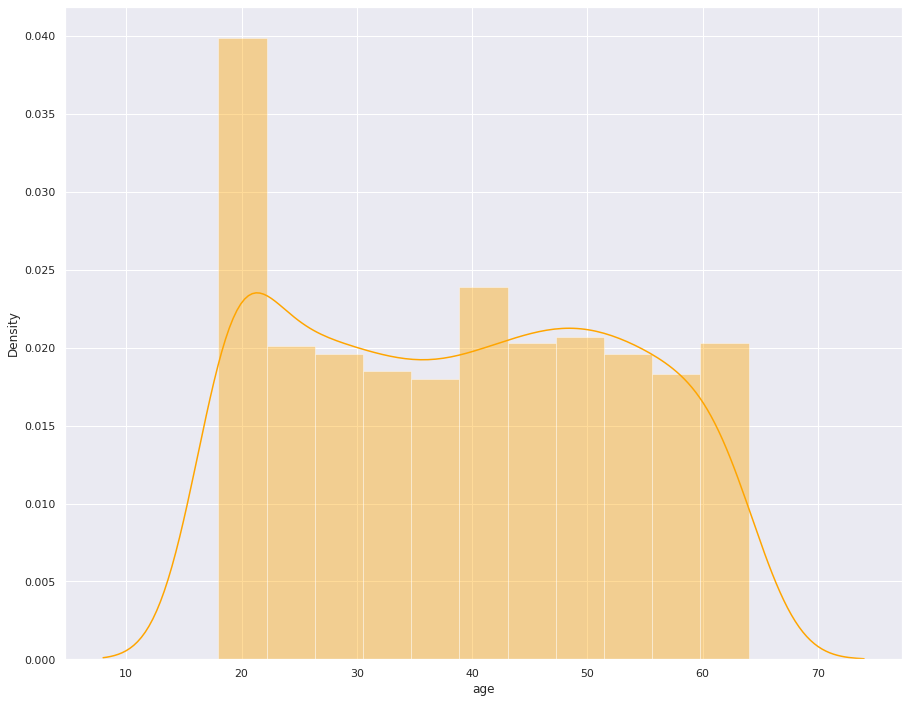

In [195]:
#Age
ax = sns.distplot(data["age"], color = 'orange')

A lot of young people

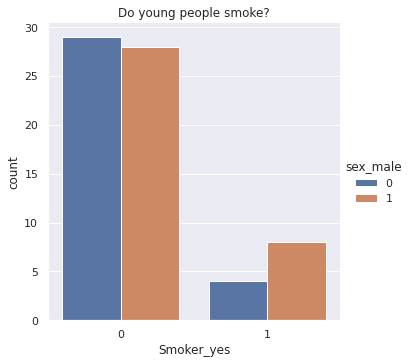

In [196]:
#Do young people smoke?
sns.catplot(x="Smoker_yes",kind="count", hue="sex_male", data=data[(data.age==18)]).set(title="Do young people smoke?")

Yes, they do. Lets see.

[Text(0.5, 1.0, 'Smoking at 18yrs affects the cost of treatment')]

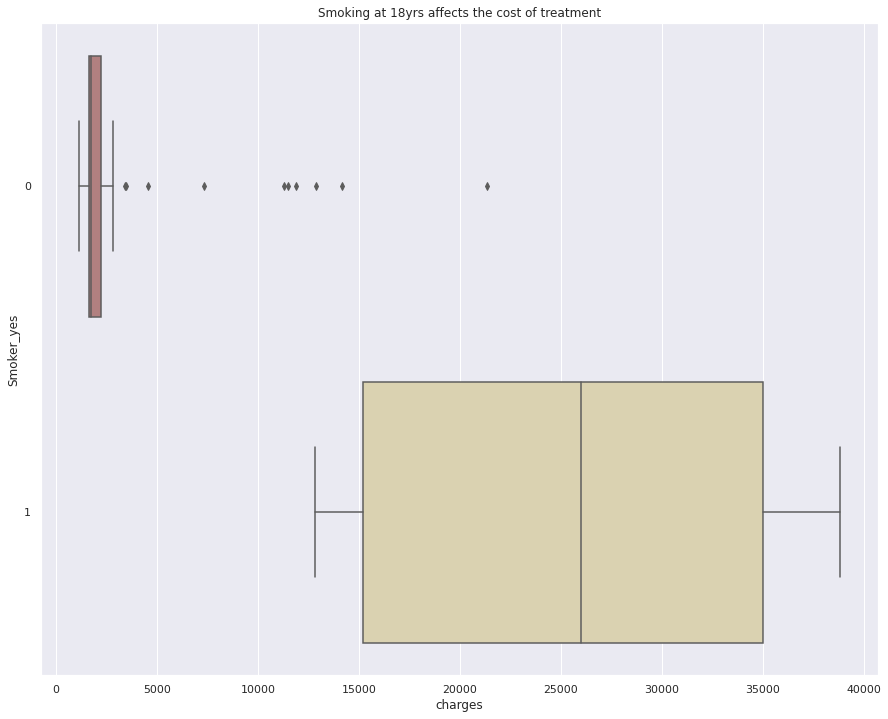

In [197]:
sns.boxplot(x="charges",y="Smoker_yes", data=data[(data.age==18)], orient="h", palette="pink").set(title="Smoking at 18yrs affects the cost of treatment")

In non-smokers, we can see outliers. What 18-year-old non-smoker would want to pay for expensive treatment? Maybe someone with a complicated illness or an accident.

[Text(0.5, 1.0, 'How age of smokers affect the cost?')]

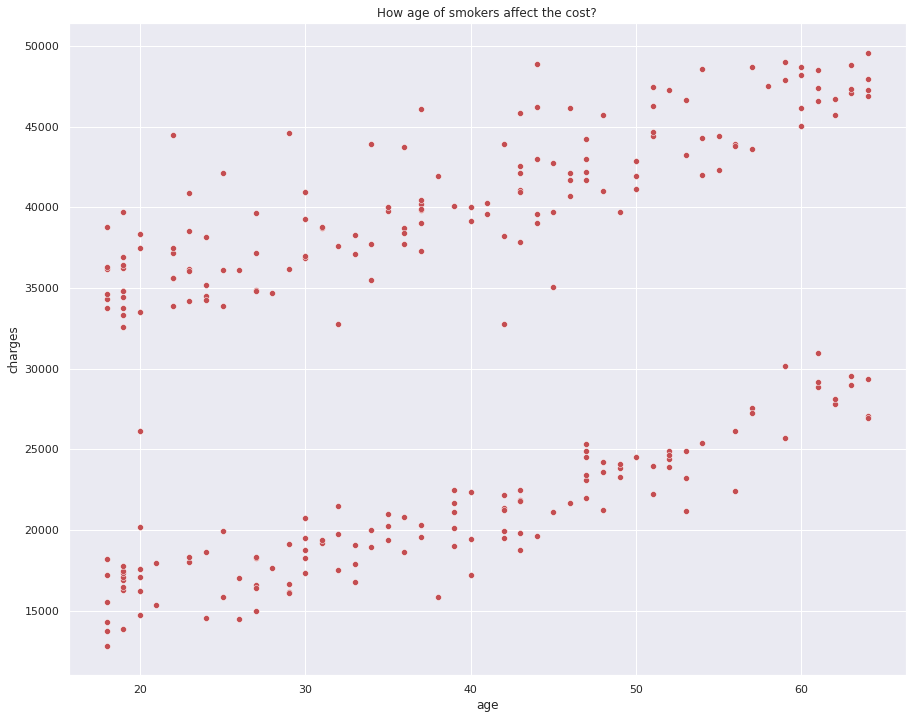

In [198]:
sns.scatterplot(x="age",y="charges",color="r",data=data[data.Smoker_yes==1]).set(title="How age of smokers affect the cost?")

Increase the cost logically.
We can see two separate point clouds, there must be a variable that divided them ...


Let's investigate BMI for a moment

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


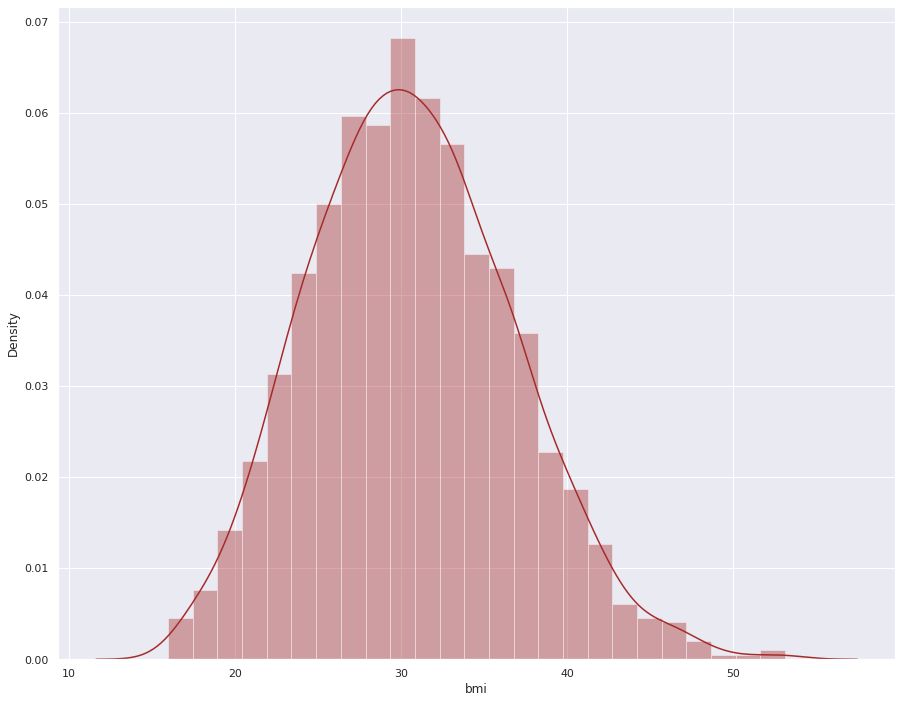

In [199]:
#BMI
ax = sns.distplot(data["bmi"], color = 'brown')

We have to understand the BMI. From 30 the Obesity begins.
Then you can take a look at the treatments of patients with <30 and> 30 BMI

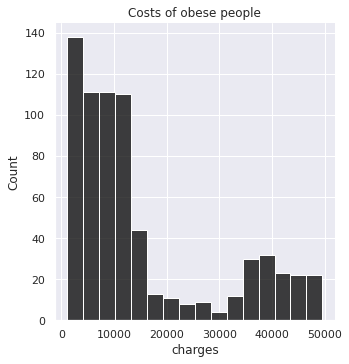

In [200]:
#Obese people ()>30) charges
sns.displot(data[(data.bmi >= 30)]['charges'], color="black").set(title="Costs of obese people")

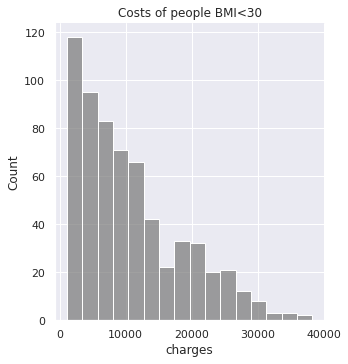

In [201]:
#Rest
sns.displot(data[(data.bmi < 30)]['charges'], color='grey').set(title="Costs of people BMI<30")

Obese people spend much more on treatment!

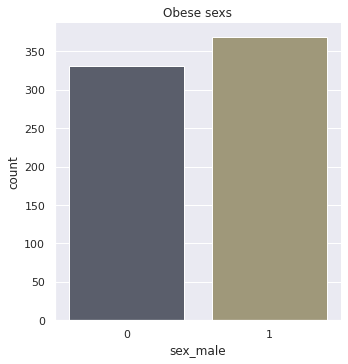

In [202]:
#Obese sexs ()>30) charges
sns.catplot(x="sex_male",kind="count",palette="cividis", data=data[(data.bmi>=30)]).set(title="Obese sexs")

Now, Smoke and Obesity relationship...

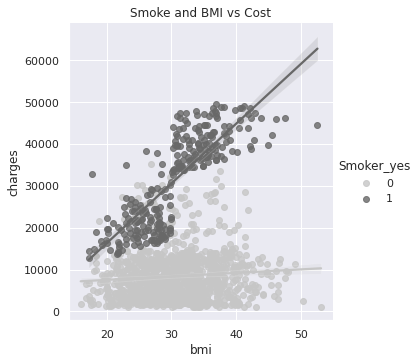

In [203]:
sns.lmplot(x='bmi',y='charges',data=data,palette='Greys',hue='Smoker_yes').set(title="Smoke and BMI vs Cost")

People with a high BMI and smokers pay much more expensive treatments

Now, returning to the relationship of smokers and age, what if we consider the BMI feature?

[Text(0.5, 1.0, 'How age of smokers affect the cost?')]

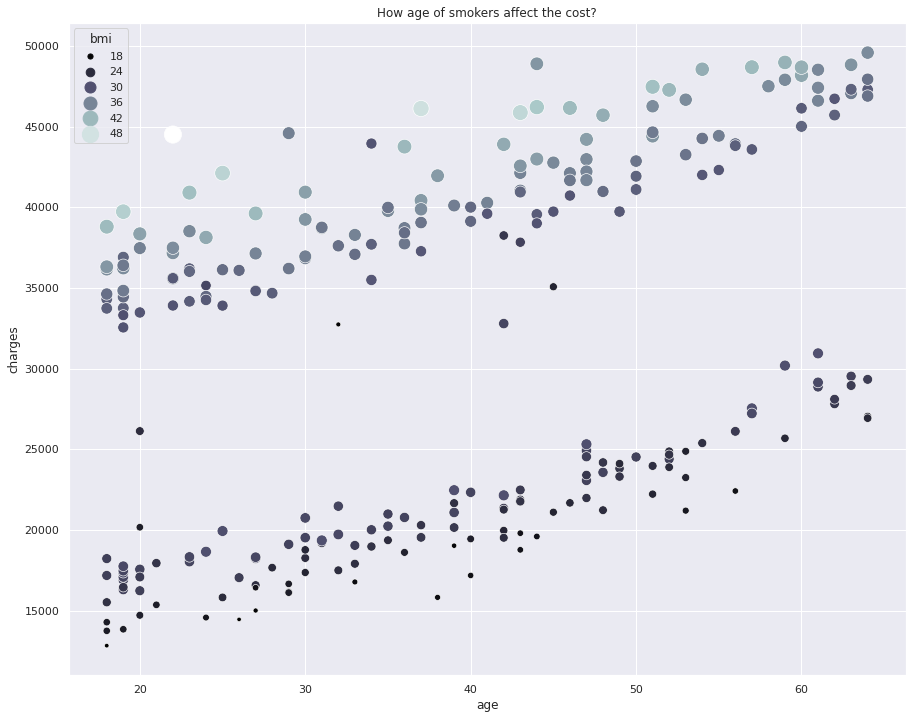

In [204]:
sns.scatterplot(x='age',y='charges',data=data[data.Smoker_yes==1],palette='bone',hue="bmi",size="bmi",sizes=(20,300)).set(title="How age of smokers affect the cost?")

There is! High BMI smokers spend much more than low BMI smokers as they get older

Now let's see the cildren

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


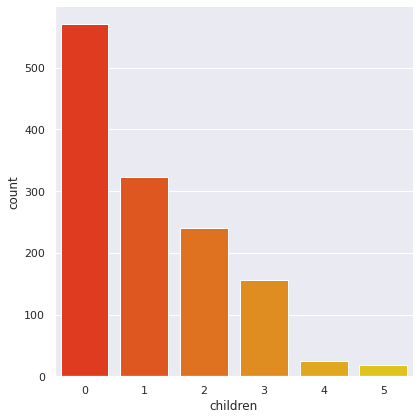

In [205]:
#Children
sns.catplot(x="children", kind="count", palette="autumn", data=data, size = 6)

Most of the patients do not have children.

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


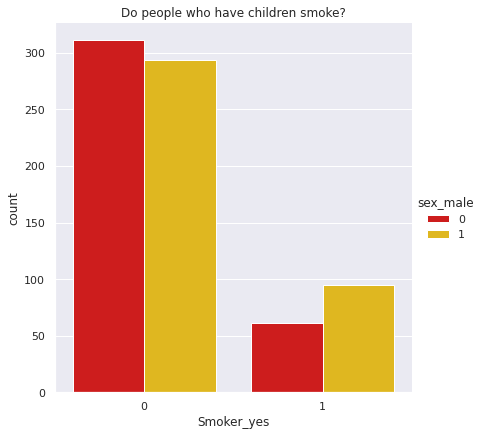

In [206]:
#Do people who have children smoke?
sns.catplot(x="Smoker_yes", kind="count", palette="hot",hue = "sex_male",
            data=data[(data.children > 0)], size = 6).set(title="Do people who have children smoke?")

Yes, but not so many

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


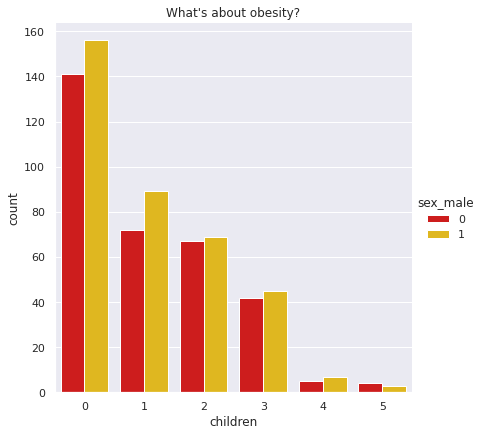

In [207]:
#What's about obesity?
sns.catplot(x="children", kind="count", palette="hot",hue = "sex_male",
            data=data[(data.bmi>=30)], size = 6).set(title="What's about obesity?")

# Model

In [208]:
from sklearn.model_selection import train_test_split

seed=14


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [209]:
lr = LinearRegression(n_jobs = -1)
lasso = Lasso()
ridge = Ridge()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor(n_jobs= -1)
rf = RandomForestRegressor()
ab = AdaBoostRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor(n_jobs = -1)
lgb = LGBMRegressor(n_jobs = -1)

In [210]:
X= data.drop(["charges"],axis=1)
Y= data.charges
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
X

,age,bmi,children,sex_male,Smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [211]:
from seaborn.external.husl import rgb_prepare
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def entrenar(model):
    model.fit(X_train, y_train)
    return (model.score(X_train, y_train),model.score(X_test, y_test))

models = {'LinearRegression': lr,
          'Lasso': knn,
          'Rige': ridge,
          'DecisionTreeRegressor': dt,
          'SVR':svr,
          'KNN':knn,
          'RandomForestRegressor':rf,
          'AdaBoostRegressor':ab,
          'XGB': xgb,
          'GradientBoostingRegressor': gb,
          'LGBMRegressor': lgb}
scores={}
train_scores={}
for nombre, modelo in models.items():
    scores[nombre]=entrenar(modelo)[1]
    train_scores[nombre]=entrenar(modelo)[0]

scores = pd.DataFrame(scores,index=['Score']).transpose()
scores = scores.sort_values('Score')

train_scores = pd.DataFrame(train_scores,index=['Train Score']).transpose()
train_scores = train_scores.sort_values('Train Score')

In [212]:
cm = sns.color_palette('flare',as_cmap=True)
scores = scores.style.background_gradient(cmap=cm)
scores

,Score
SVR,-0.116124
Lasso,0.074510
KNN,0.074510
DecisionTreeRegressor,0.755022
Rige,0.769136
LinearRegression,0.769197
XGB,0.818881
AdaBoostRegressor,0.853991
RandomForestRegressor,0.869994
LGBMRegressor,0.874252


In [213]:
train_scores.style.background_gradient(cmap=cm)

,Train Score
SVR,-0.095644
Lasso,0.444759
KNN,0.444759
Rige,0.748351
LinearRegression,0.748374
AdaBoostRegressor,0.823039
GradientBoostingRegressor,0.894563
LGBMRegressor,0.939721
RandomForestRegressor,0.973668
XGB,0.994152


be careful with overfitting!

In [214]:
gb.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}